In [87]:
import nbimporter
import numpy as np
from s04_01_general_Q import get_Q_T_H_d_t_i

## 第五節　電気ヒーター床暖房 / Section 5  Electric floor heating

1．適用範囲～4．記号及び単位は省略

1. Scope of application ~ 4. Symbols and units are omitted

### 5．最大暖房出力 / Maximum heating output

$$\large
Q_{max,H,d,t} = q_{max,H} \times A_{f} \times 3600 \times 10^{-6}
$$

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h) / Maximum heating output per hour at time $ t $ of date $ d $  
$q_{max,H}$：単位面積当たりの上面最大放熱能力(W/m<sup>2</sup>) / Maximum top surface heat dissipation capacity per unit area   
$A_{f}$：敷設面積(m<sup>2</sup>) / Laying area  

単位面積当たりの上面最大放熱能力$q_{max,H}$は 162W/m<sup>2</sup> とする。

The top surface maximum heat dissipation capacity $ q_{max, H} $ per unit area is set to 162 W/m<sup>2</sup>.

In [88]:
def get_Q_max_H_d_t(A_f):
    """最大暖房出力
    
    :param A_f: 敷設面積
    :type A_f: float
    :return: 最大暖房出力
    :rtype: ndarray
    """
    q_max_H = 162.0
    return np.ones(24 * 365) * q_max_H * A_f * 3600 * 10 ** (-6)  # (1)

### 6．暖房エネルギー消費量 / Heating energy consumption

#### 6.1　消費電力量 / Power consumption

$$
\large
E_{E,H,d,t} = Q_{T,H,d,t} \times \frac{1}{r_{up}} \times 10^{3} \div 3600
$$

$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの消費電力量(kWh/h) / Power consumption per hour at time $ t $ of date $ d $  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における処理暖房負荷(MJ/h) / Processing heating load at time $ t $ of date $ d $   
$r_{up}$：上面放熱率 / Top surface heat release rate  

In [89]:
def calc_E_E_H_d_t(A_f, r_up, L_H_d_t):
    """消費電力量
    
    :param A_f: 敷設面積
    :type A_f: float
    :param r_up: 温水床暖房の上面放熱率
    :type r_up: float
    :param L_H_d_t: 暖冷房区画の１時間当たりの暖房負荷
    :type L_H_d_t: ndarray
    :return: 消費電力量
    :rtype: ndarray
    """
    # 最大暖房出力
    Q_max_H_d_t = get_Q_max_H_d_t(A_f)

    # 処理暖房負荷
    Q_T_H_d_t = get_Q_T_H_d_t_i(Q_max_H_d_t, L_H_d_t)

    # 消費電力量
    E_E_H_d_t = Q_T_H_d_t / r_up * 10 ** 3 / 3600  # (2)

    return E_E_H_d_t

#### 6.2　ガス消費量 / Kerosene consumption

日付$d$の時刻$t$における１時間当たりのガス消費量$E_{G,H,d,t}$は0とする。

It is assumed that gas consumption $ E_{G, H, d, t} $ per hour at time $ t $ of date $ d $ is zero.

In [90]:
def get_E_G_H_d_t():
    """ガス消費量
    
    :return: ガス消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

#### 6.3　灯油消費量 / Kerosene consumption

日付$d$の時刻$t$における１時間当たりの灯油消費量$E_{K,H,d,t}$は0とする。

It is assumed that kerosene consumption $ E_{K, H, d, t} $ per hour at time $ t $ of date $ d $ is zero.

In [91]:
def get_E_K_H_d_t():
    """灯油消費量
    
    :return: 灯油消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

#### 6.4　その他の燃料による一次エネルギー消費量 / Primary energy consumption by other fuels

日付$d$の時刻$t$における１時間当たりのその他の燃料による一次エネルギー消費量$E_{M,H,d,t}$は0とする。

Primary energy consumption $ E_{M, H, d, t} $ by other fuel per hour at time $ t $ of date $ d $ is 0.

In [92]:
def get_E_M_H_d_t():
    """その他の燃料による一次エネルギー消費量
    
    :return: その他の燃料による一次エネルギー消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

## 付録 A 機器の性能を表す仕様の決定方法 / Appendix A How to determine the specification that represents the performance of the device

### A.1　記号及び単位 / Symbol and unit

省略

### A.2　敷設面積 / Laying area

$$\large
A_{f} = A_{HCZ} \times r_{Af}
$$

$A_{f}$：敷設面積(m<sup>2</sup>) / Laying area  
$A_{HCZ}$：電気ヒーター床暖房により暖房される暖冷房区画の床面積(m<sup>2</sup>) / Electric heating floor area of heating and cooling compartments heated by floor heating   
$r_{Af}$：床暖房パネルの敷設率 / Floor heating panel laying rate

In [93]:
# 敷設面積 A_f
def get_A_f(A_HCZ, r_Af):
    """敷設面積
    
    :param A_HCZ: 暖冷房区画の床面積 (m2)
    :type A_HCZ: float
    :param r_Af: 床暖房パネルの敷設率
    :type r_Af: float
    :return: 敷設面積
    :rtype: float
    """
    return A_HCZ * r_Af  # (1)

$$\large
r_{Af} =  \frac{A_{f}}{A_{HCZ}}
$$

$A_{f}$：床暖房パネルの敷設面積(m<sup>2</sup>) / Floor heating panel laying area  
$A_{HCZ}$：電気ヒーター床暖房により暖房される暖冷房区画の床面積(m<sup>2</sup>) / Electric heating floor area of heating and cooling compartments heated by floor heating  

In [94]:
# 床暖房パネルの敷設率 r_Af
def get_r_Af(A_f, A_HCZ):
    """[summary]
    
    :param A_f: 敷設面積
    :type A_f: float
    :param A_HCZ: 暖冷房区画の床面積 (m2)
    :type A_HCZ: float
    :return: 床暖房パネルの敷設率
    :rtype: float
    """
    return A_f / A_HCZ  # (2)

### A.3　上面放熱率 / Top surface heat release rate

$$\large
r_{up} =  \frac{(1-H) \times (R_{si}+R_{U})+(R_{P}+R_{D}+R_{se})}{R_{si}+R_{U}+R_{P}+R_{D}+R_{se}}\\
\\
\large = 1-H \times \frac{(R_{si}+R_{U})}{R_{si}+R_{U}+R_{P}+R_{D}+R_{se}}\\
\\
\large = 1-H \times (R_{si}+R_{U}) \times U
$$

$r_{up}$：上面放熱率 / Top surface heat release rate  
$R_{si}$：床暖房パネルの床上側表面熱伝達抵抗(m<sup>2</sup>K/W) / Floor top surface heat transfer resistance of floor heating panel  
$R_{U}$：床暖房パネル内の発熱体から床仕上げ材上側表面までの熱抵抗(m<sup>2</sup>K/W) / Thermal resistance from the heating element in the floor heating panel to the upper surface of the floor finish  
$R_{P}$：床暖房パネル内の発熱体から床暖房パネル床下側表面までの熱抵抗(m<sup>2</sup>K/W) / Thermal resistance from the heating element in the floor heating panel to the floor under surface of the floor heating panel  
$R_{D}$：床暖房パネルの下端から床下側表面までの熱抵抗(m<sup>2</sup>K/W) / Thermal resistance from the lower edge of the floor heating panel to the underfloor surface  
$R_{se}$：床下側表面熱伝達抵抗(m<sup>2</sup>K/W) / Underfloor surface heat transfer resistance  
$H$：温度差係数 / Temperature difference coefficient   
$U$：当該床の部位の熱貫流率(W/m<sup>2</sup>K) / Heat transmission coefficient of the area of the floor 

### A.4　複数の電気ヒーター床暖房が設置される場合の仕様の決定方法 / How to determine the specifications when multiple electric heater floor heating is installed

省略

ommision

## 試算例

In [95]:
def calc_Q_UT_H_d_t(A_f, r_up, L_H_d_t):
    """未処理暖房負荷
    
    :param A_f: 敷設面積
    :type A_f: float
    :param r_up: 温水床暖房の上面放熱率
    :type r_up: float
    :param L_H_d_t: 暖冷房区画の１時間当たりの暖房負荷
    :type L_H_d_t: ndarray
    :return: 未処理暖房負荷
    :rtype: ndarray
    """
    # 最大暖房出力
    Q_max_H_d_t = get_Q_max_H_d_t(A_f)

    # 処理暖房負荷
    Q_T_H_d_t = get_Q_T_H_d_t_i(Q_max_H_d_t, L_H_d_t)

    # 未処理暖房負荷
    Q_UT_H_d_t = L_H_d_t - Q_T_H_d_t

    return Q_UT_H_d_t

In [96]:
def get_default_electric_floor_heating():
    
    house_base = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87,"eta_A_H": 4.3, "eta_A_C": 2.8}
    H_MR = {'type': '電気ヒーター床暖房', "r_Af": 0.4, "r_up": 0.95}
    H_OR = None
    i = 1
    
    return house_base, H_MR, H_OR, i    

In [97]:
def calc_results(param, H_MR, H_OR, i):
    """暖冷房区画iにおける電気ヒーター床暖房の一次エネルギー消費量を計算するための関数

    :param param:   面積や外皮性能等
    :type param:    dict
    :param H_MR:    主たる居室の暖房設備
    :type H_MR:     dict
    :param H_OR:    その他の居室の暖房設備
    :type H_OR:     dict
    :param i:       暖冷房区画番号
    :type i:        int
    :return:        暖房一次エネルギー消費量
    :rtype:         ndarray
    """
    
    if __name__ == "__main__":

        from s02_01_b_heat_conversion_coefficient import get_f_prim
        from s03_01_hc_load_general import get_Q, get_A_HCZ_i
        from s03_02_envelope_performance import calc_r_env, get_Q_dash, get_eta_H, get_eta_C
        from s04_01_general import calc_heating_load, get_alpha_UT_H_MR, get_alpha_UT_H_OR
        from s04_01_a_heating_method import calc_heating_mode

        region = param["region"]
        sol_region = None
        A_A = param["A_A"]
        A_MR = param["A_MR"]
        A_OR = param["A_OR"]
        A_env = param["A_env"]
        U_A = param["U_A"]
        eta_A_H = param["eta_A_H"]
        eta_A_C = param["eta_A_C"]
        NV_MR = 0
        NV_OR = 0
        r_A_ufvnt = None
        underfloor_insulation = False
        TS = None
        HEX = None

        mode_C = None
        mode_H = '居室のみを暖房する方式でかつ主たる居室とその他の居室ともに温水暖房を設置する場合に該当しない場合'

        # 暖冷房区画の床面積
        A_HCZ = get_A_HCZ_i(i, A_A, A_MR, A_OR)

        # 暖房方式及び運転方法の区分
        mode_MR, mode_OR = calc_heating_mode(region=region, H_MR=H_MR, H_OR=H_OR)

        # 敷設面積
        r_Af = H_MR["r_Af"] if i == 1 else H_OR["r_Af"]
        A_f = get_A_f(A_HCZ, r_Af)

        # 上面放熱率
        r_up = H_MR["r_up"] if i == 1 else H_OR["r_up"]

        # 床面積の合計に対する外皮の部位の面積の合計の比
        r_env = calc_r_env(method='当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法',
                           A_env=A_env, A_A=A_A)

        # 熱損失係数
        Q_dash = get_Q_dash(U_A, r_env)
        Q = get_Q(Q_dash)

        # 日射取得係数
        mu_H = get_eta_H(eta_A_H, r_env)
        mu_C = get_eta_C(eta_A_C, r_env)

        # 暖房負荷
        L_H_d_t = \
            calc_heating_load(region, sol_region, A_A, A_MR, A_OR, Q, mu_H, mu_C, NV_MR, NV_OR, TS, r_A_ufvnt, HEX,
                              underfloor_insulation, mode_H, mode_C, spec_MR=H_MR, spec_OR=H_OR, mode_MR=mode_MR,
                              mode_OR=mode_OR, SHC=None)[0][i - 1]

        # エネルギー消費量
        E_E_H_d_t = calc_E_E_H_d_t(A_f, r_up, L_H_d_t)
        E_G_H_d_t = get_E_G_H_d_t()
        E_K_H_d_t = get_E_K_H_d_t()
        E_M_H_d_t = get_E_M_H_d_t()

        # 未処理暖房負荷の設計一次エネルギー消費量相当値
        Q_UT_H_d_t = calc_Q_UT_H_d_t(A_f, r_up, L_H_d_t)
        alpha_UT_H = get_alpha_UT_H_MR(region, mode_MR) if i == 1 else get_alpha_UT_H_OR(region, mode_OR)
        E_UT_H_d_t = Q_UT_H_d_t * alpha_UT_H

        f_prim = get_f_prim()
        E_H_d_t = E_E_H_d_t * f_prim / 1000 + E_G_H_d_t + E_K_H_d_t + E_M_H_d_t + E_UT_H_d_t
        print('一次エネルギー消費量:{}MJ/y'.format(np.sum(E_H_d_t)))

        return E_H_d_t


In [98]:
def get_each_graph(_E_H_d_t):

    import matplotlib.pyplot as plt

    _E_H_d = np.sum(_E_H_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_H_d, label = "E_H")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_H_d_t.reshape(365,24)[334], label = "E_H:12/1")
    grh_date.plot(_E_H_d_t.reshape(365,24)[59], label = "E_H:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

- 初期条件での計算

In [99]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()

_E_H_d_t_1 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:24316.934823192434MJ/y


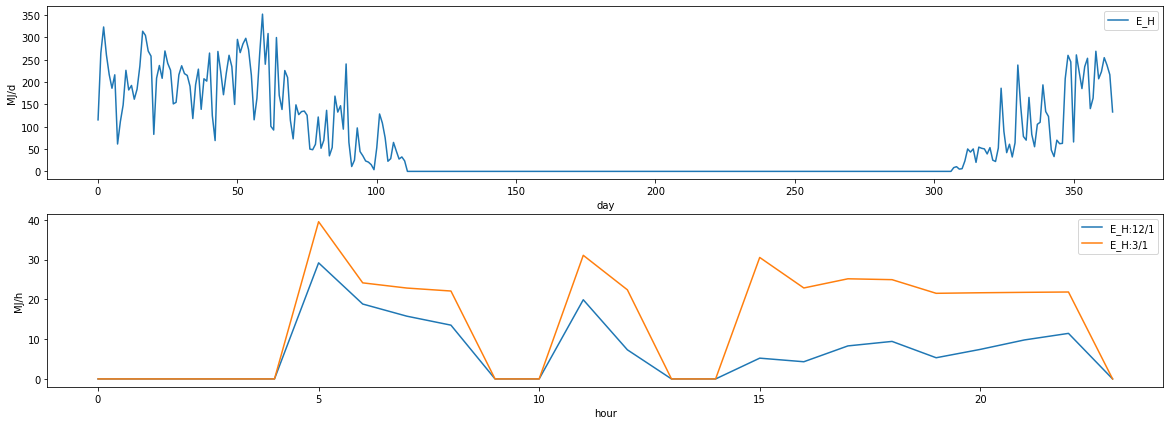

In [100]:
get_each_graph(_E_H_d_t_1)

### 計算条件2


- 地域区分を1地域に変更

In [101]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
house_base['region'] = 1

_E_H_d_t_2 = calc_results(house_base, H_MR, H_OR, i)


一次エネルギー消費量:77491.09025902834MJ/y


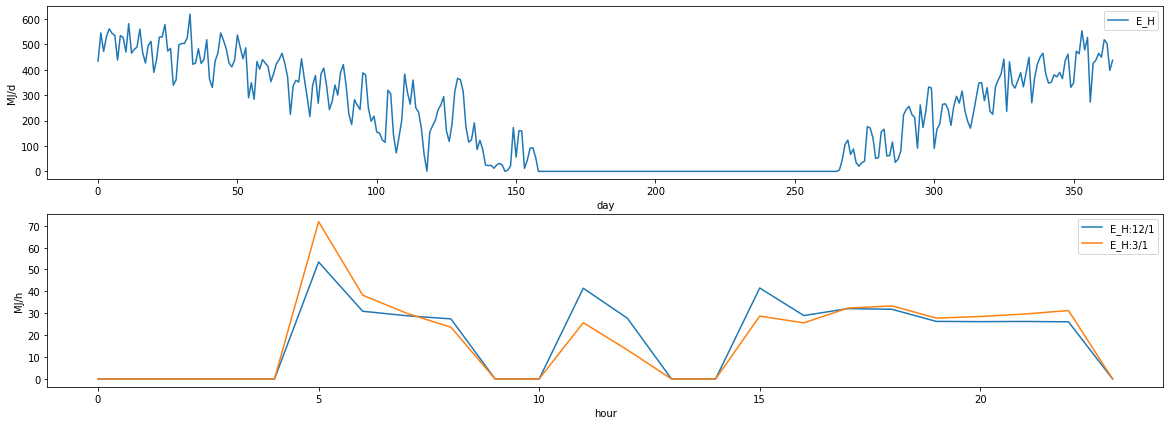

In [102]:
get_each_graph(_E_H_d_t_2)

### 計算条件3

- 住戸、主居室、その他居室の床面積を90m2、25m2、40m2に変更
- 外皮面積の合計を250m2に変更

In [103]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
house_base['A_A'] = 90
house_base['A_MR'] = 25
house_base['A_OR'] = 40
house_base['A_env'] = 250

_E_H_d_t_3 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:21235.62398128482MJ/y


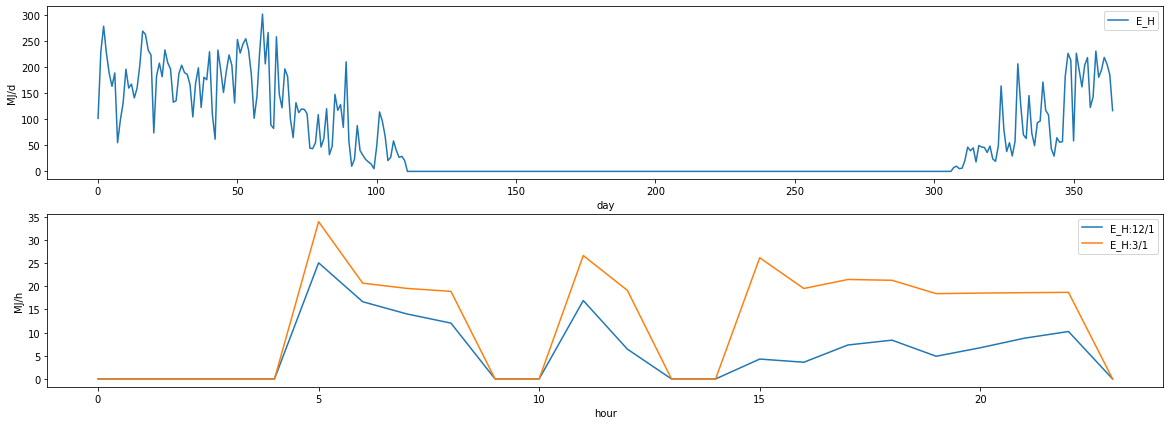

In [104]:
get_each_graph(_E_H_d_t_3)

### 計算条件4

- 外皮平均熱貫流率を0.6に変更

In [105]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
house_base['U_A'] = 0.6

_E_H_d_t_4 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:15280.084265796355MJ/y


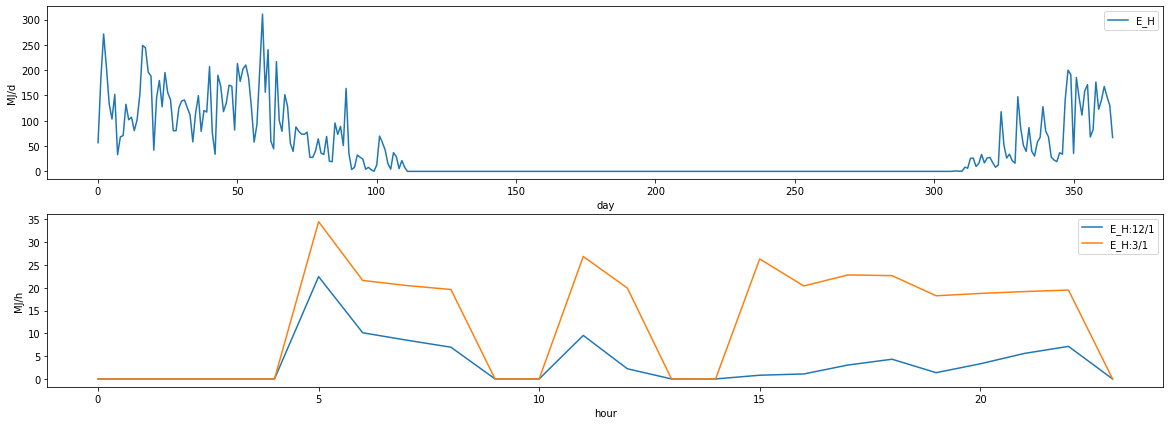

In [106]:
get_each_graph(_E_H_d_t_4)

### 計算条件5

- 暖房期平均日射熱取得率を3.0に変更

In [107]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
house_base['eta_A_H'] = 3.0

_E_H_d_t_5 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:29892.684415504587MJ/y


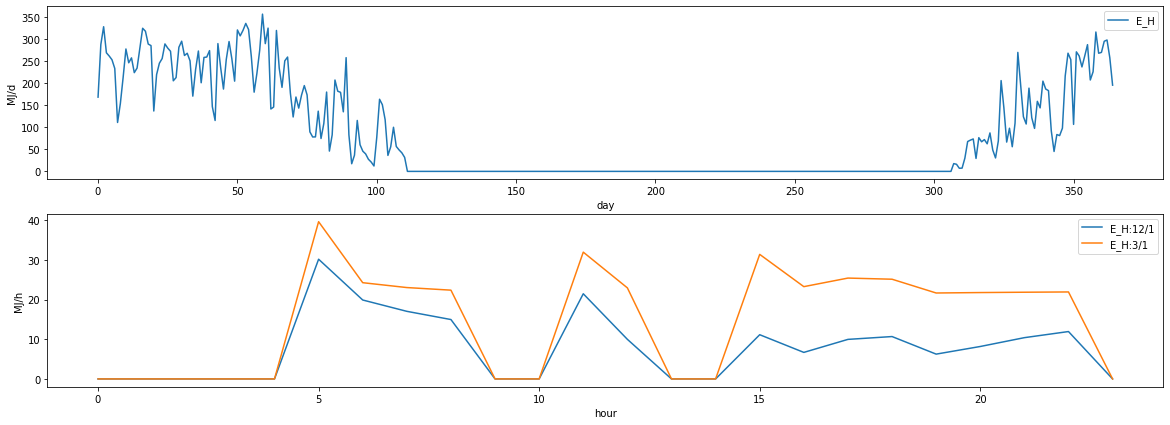

In [108]:
get_each_graph(_E_H_d_t_5)

### 計算条件6

- 冷房期平均日射熱取得率を2.0に変更

In [109]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
house_base['eta_A_C'] = 2.0

_E_H_d_t_6 = calc_results(house_base, H_MR, H_OR, i)


一次エネルギー消費量:24316.934823192434MJ/y


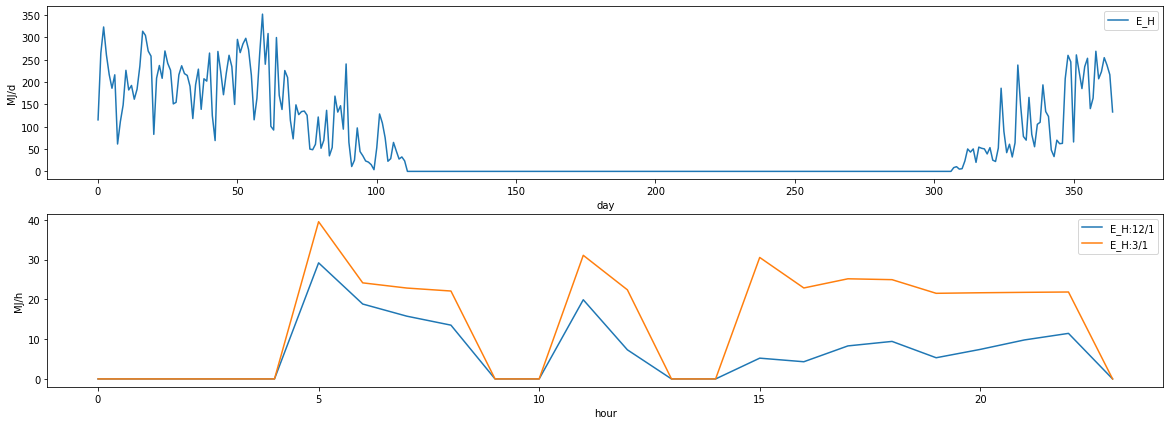

In [110]:
get_each_graph(_E_H_d_t_6)

### 計算条件7

- 仮想床の床面積を除いた敷設率を0.5に変更

In [111]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
H_MR['r_dash_Af'] = 0.5

_E_H_d_t_7 = calc_results(house_base, H_MR, H_OR, i)


一次エネルギー消費量:23848.863291778966MJ/y


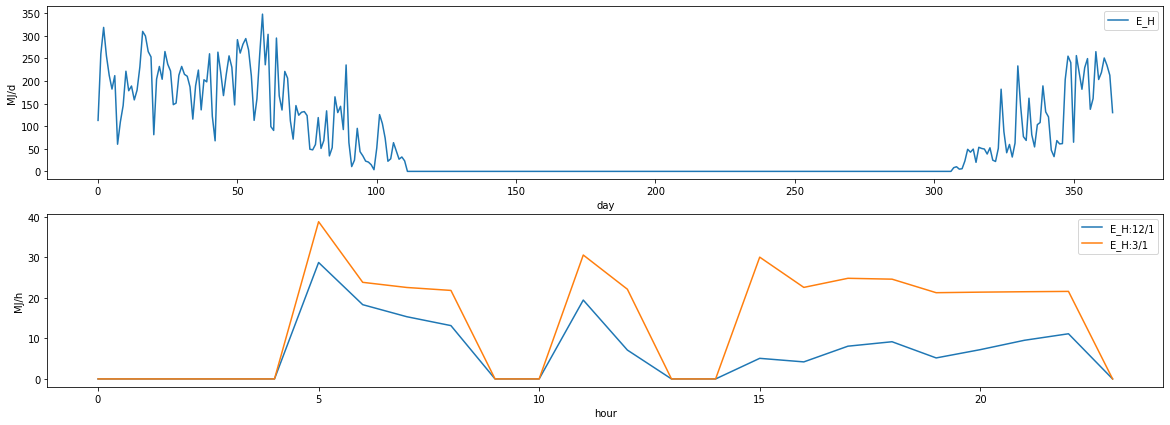

In [112]:
get_each_graph(_E_H_d_t_7)

### 計算条件8

- 上面放熱率（床の断熱）を0.85に変更

In [113]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
H_MR['r_up'] = 0.85

_E_H_d_t_8 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:26861.692467860772MJ/y


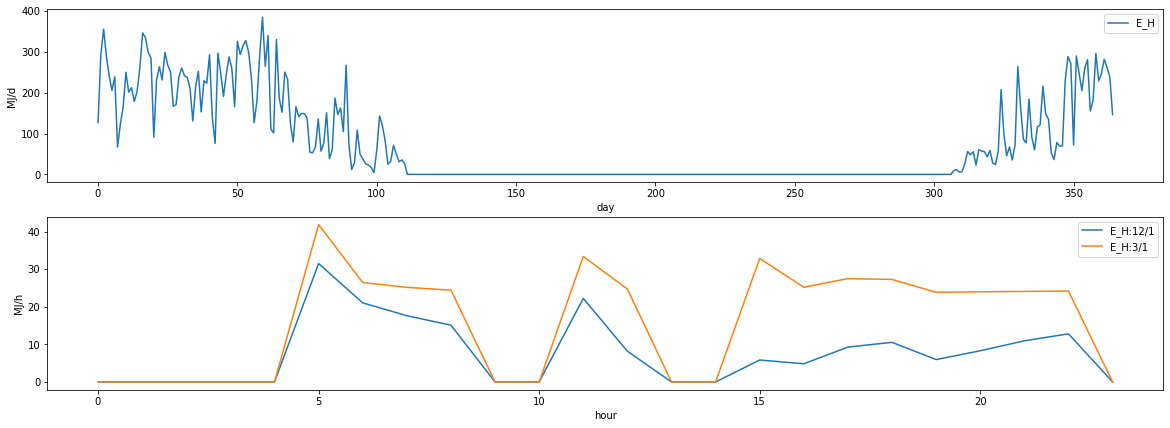

In [114]:
get_each_graph(_E_H_d_t_8)

### 計算条件9

- その他の居室の暖房設備を電気ヒーター床暖房、敷設率を0.4、上面放熱率（床の断熱）を0.95に変更
- 暖冷房区画を5に変更

In [115]:
house_base, H_MR, H_OR, i = get_default_electric_floor_heating()
H_OR = {'type': '電気ヒーター床暖房', "r_Af": 0.4, "r_up": 0.95}
i = 5

_E_H_d_t_9 = calc_results(house_base, H_MR, H_OR, i)

一次エネルギー消費量:3045.2409366385846MJ/y


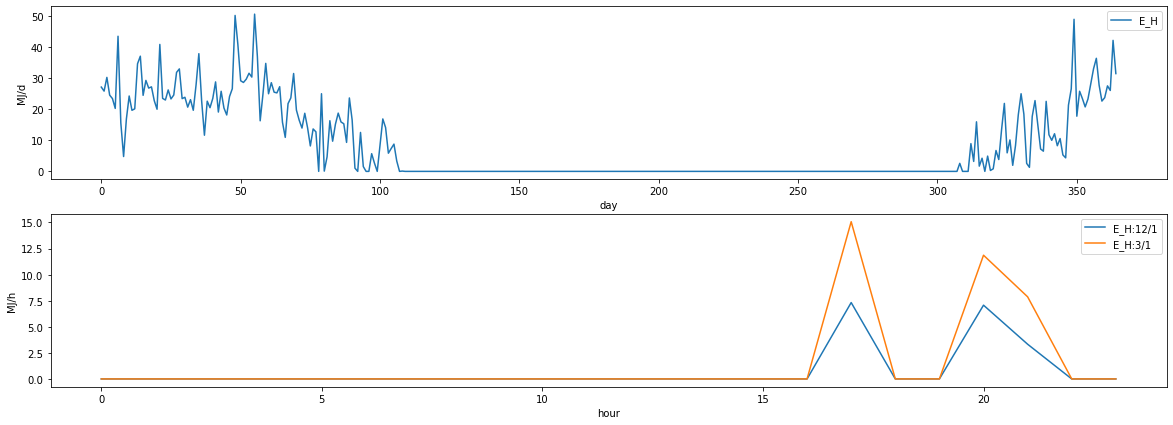

In [116]:
get_each_graph(_E_H_d_t_9)

### 比較

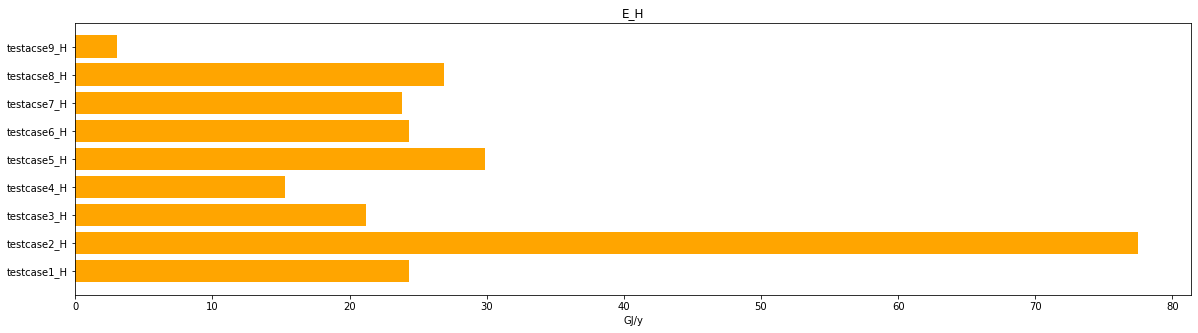

In [117]:
import matplotlib.pyplot as plt

dat_H = {"testcase1_H": np.sum(_E_H_d_t_1)/1000, "testcase2_H": np.sum(_E_H_d_t_2)/1000, "testcase3_H": np.sum(_E_H_d_t_3)/1000, 
         "testcase4_H": np.sum(_E_H_d_t_4)/1000, "testcase5_H": np.sum(_E_H_d_t_5)/1000, "testcase6_H": np.sum(_E_H_d_t_6)/1000,
         "testacse7_H": np.sum(_E_H_d_t_7)/1000, "testacse8_H": np.sum(_E_H_d_t_8)/1000, "testacse9_H": np.sum(_E_H_d_t_9)/1000}

x_H = list(dat_H.keys())
y_H = list(dat_H.values())

fig = plt.figure(figsize=(20,5))

grh_H = fig.add_subplot(111)
grh_H.barh(x_H,y_H, color = "orange")
grh_H.set_xlabel("GJ/y")
grh_H.set_title("E_H")

plt.show()